In [1]:
from scipy import ndimage
import cv2
import numpy as np
from models.inference_unet import*
import os
from typing import NamedTuple, List, Callable, List, Tuple, Optional, Union
from abc import ABC, abstractmethod
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import string
import pandas as pd
import pickle 
from skimage.color import rgb2lab
from torchvision import transforms
from multipledispatch import dispatch
from analysis.analysis_h2o2 import wellsegment_h2o2
from time import time

(512, 512, 3)
(512, 512)
col list modified : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
elapsed time 5.2056591510772705


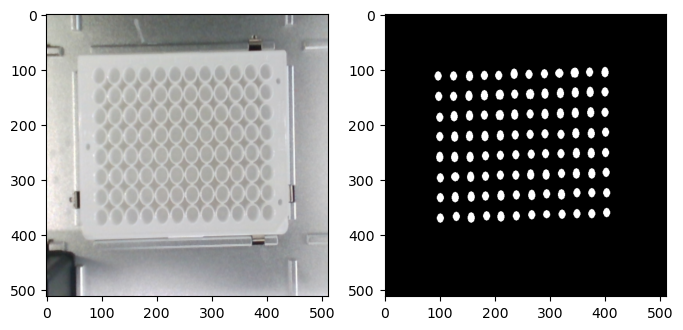

In [11]:
t1 = time()
mask_path = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron_20240306\dev\segmentation_modelling\WhiteWellPlate_Segmentation\images for preestimation\NUNC'
file = 'NUNC-BLANK8.png'

# get mask from first image prior to liquid transfer
cls = wellsegment_h2o2(mask_path, file ,None, squeeze_fac= 0.4, col_list = [8]*12, path=mask_path)
cls.extract() # save pickle file of sorted mask
#wellsegment_h2o2.visualize_patches(cls.instance_mask_sorted,lst = ['E12','F12','G12','H12'])
wellsegment_h2o2.visualize(cls.image, cls.mask)

t2=time()

print('elapsed time {}'.format(t2-t1))

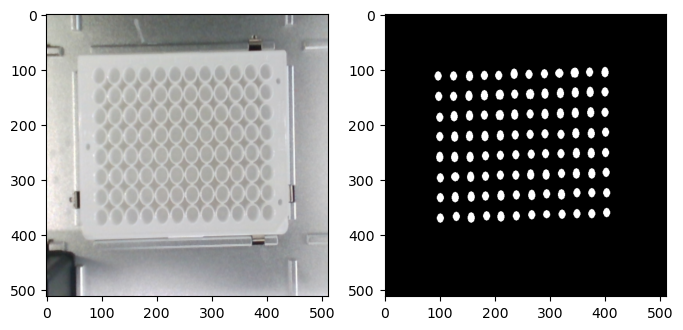

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(cls.image)
plt.subplot(1,2,2)
plt.imshow(cls.mask, cmap = 'gray')

In [4]:
# load mask and do prestimation
#mask_path = r'D:\All_files\pys\AI_algos\WhiteWellPlate_Segmentation'
image_path = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\dev\segmentation_modelling\WhiteWellPlate_Segmentation\images for preestimation\COSTAR\preestimation'
image_file = 'COSTAR-pre23.png'

config_path = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\DriveSMB'
with open(os.path.join(config_path,'ot2_transfer_config_h2o2.json'),'r') as f:
    data = json.load(f)
    
tcdict = data['transfer_3']['locs']

cls2 = wellsegment_h2o2.load_pkl(image_path,image_file,os.path.join(mask_path, 'mask.pkl'))
cls2.analyze_prestimation(tcdict)
cls2.reservoir_list

dict_keys(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11', 'H11', 'A12', 'B12', 'C12', 'D12', 'E12', 'F12', 'G12', 'H12'])
15.312077817049893
35.39323950102835


array([None, 'E4', 'E6'], dtype=object)

In [6]:
mask_path

'C:\\Users\\scrc112\\Desktop\\work\\biplab\\OpenTron\\dev\\segmentation_modelling\\WhiteWellPlate_Segmentation\\images for preestimation\\NUNC'

In [13]:
cls2

In [8]:
# titrate
#path_titrate = r'D:\All_files\pys\AI_algos\WhiteWellPlate_Segmentation\images for preestimation\NUNC\preestimation'

#cls3 = wellsegment_h2o2.load_pkl(image,os.path.join(mask_path, 'mask.pkl'))
#cls3.analyze_titration(path_titrate)

In [14]:
path_titrate = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\dev\segmentation_modelling\WhiteWellPlate_Segmentation\images for preestimation\NUNC\preestimation'
#cls3 = wellsegment_h2o2.load_pkl(image_path,image_file,os.path.join(mask_path, 'mask.pkl'))
cls2.analyze_titration(path_titrate)

samp_1_tit_1.png
samp_1_tit_2.png
samp_1_tit_3.png
samp_1_tit_4.png
samp_1_tit_5.png
samp_1_tit_6.png
samp_1_tit_7.png
samp_2_tit_1.png
samp_2_tit_2.png
samp_2_tit_3.png
samp_2_tit_4.png
samp_2_tit_5.png
samp_2_tit_6.png
samp_2_tit_7.png
samp_3_tit_1.png
samp_3_tit_2.png
samp_3_tit_3.png
samp_3_tit_4.png
samp_3_tit_5.png
samp_3_tit_6.png
samp_3_tit_7.png


In [18]:
sub_folder = 'samp_1'
path = os.path.join(path_titrate, sub_folder)
df = pd.read_csv(os.path.join(path, 'samplist.csv'))
files = glob(os.path.join(path_titrate,folder,'*_tit*.png'))

dic1 ={}
# save for each folder
dummy = []
for file in files:
    print(file.split('\\')[-1])
    cls2.preprocess_image(file,.2)
    image = cls2.image
    labs = rgb2lab(image)
    
    dummy1 = []
    for well in df.columns:
        lab_well = labs.copy()
        mask = cls2.mask_dict[well]
        lab_well = lab_well[:,:,1] * mask
        dummy1.append(lab_well[lab_well > 0].mean())
    
    dummy.append(dummy1)

dummy = np.array(dummy)
out = pd.DataFrame({well : dummy[:,idx] for idx, well in enumerate(df.columns)})
out.to_excel(os.path.join(path,'titration_result.xlsx'))

samp_1_tit_1.png
samp_1_tit_2.png
samp_1_tit_3.png
samp_1_tit_4.png
samp_1_tit_5.png
samp_1_tit_6.png
samp_1_tit_7.png


In [ ]:
tcdict = [['A1', ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11']],
          ['A2', ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11']],
          ['A3', ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11']],
          ['A4', ['H1', 'H2', 'H3', 'H4', 'H5', 'H6','H7', 'H8', 'H9', 'H10', 'H11']]]

In [13]:
'''
path = r'D:\All_files\pys\AI_algos\WhiteWellPlate_Segmentation\images for preestimation\NUNC'
file = 'NUNC-BLANK8.png'

gen = get_trained_unet(model_name='unet_vgg11_upsampling',
                       path=r'D:\All_files\pys\AI_algos\WhiteWellPlate_Segmentation\weights',
                       params='unet_params_104_lr_1e-05.pt')


(image,mask) = get_inference(gen,image_path= os.path.join(path,file),
                  transform_hr=transforms.Compose([transforms.ToTensor(),transforms.Resize((512,512))]))

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(mask, cmap = 'gray')
'''

1

In [12]:
path_smb = r'C:\Users\scrc112\Desktop\work\biplab\OpenTron\DriveSMB'

pd.DataFrame({'reservoir_list': cls2.reservoir_list}).to_csv(os.path.join(path_smb, 'reservoir_list.csv'))

In [22]:

#print()

['A2', 'A1', 'A3', 'A4']